In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

584

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | luis correia
Processing Record 11 of Set 1 | quatre cocos
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | bahia blanca
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | qibili
City not found. Skipping...
Processing Record 19 of Set 1 | ornskoldsvik
Processing Record 20 of Set 1 | katsuura
Processing Record 21 of Set 1 | dingle
Processing Record 22 of Set 1 | coquimbo
Pr

Processing Record 36 of Set 4 | leshukonskoye
Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | kattivakkam
Processing Record 39 of Set 4 | hami
Processing Record 40 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | abu dhabi
Processing Record 43 of Set 4 | batagay
Processing Record 44 of Set 4 | gao
Processing Record 45 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | kalianget
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | georgetown
Processing Record 50 of Set 4 | dong hoi
Processing Record 1 of Set 5 | takhtamygda
Processing Record 2 of Set 5 | clarksburg
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | itarema
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | san carlos 

Processing Record 25 of Set 8 | warud
Processing Record 26 of Set 8 | jiuquan
Processing Record 27 of Set 8 | kuusamo
Processing Record 28 of Set 8 | pringsewu
Processing Record 29 of Set 8 | denpasar
Processing Record 30 of Set 8 | karlstad
Processing Record 31 of Set 8 | kosa
Processing Record 32 of Set 8 | benghazi
Processing Record 33 of Set 8 | honiara
Processing Record 34 of Set 8 | buin
Processing Record 35 of Set 8 | bumba
Processing Record 36 of Set 8 | santa eulalia
Processing Record 37 of Set 8 | yadgir
Processing Record 38 of Set 8 | thompson
Processing Record 39 of Set 8 | abu samrah
Processing Record 40 of Set 8 | tres arroyos
Processing Record 41 of Set 8 | codrington
Processing Record 42 of Set 8 | labuhan
Processing Record 43 of Set 8 | mastic beach
Processing Record 44 of Set 8 | fortuna
Processing Record 45 of Set 8 | wanxian
Processing Record 46 of Set 8 | barabai
Processing Record 47 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 8 | ilo

Processing Record 18 of Set 12 | riachao
Processing Record 19 of Set 12 | anloga
Processing Record 20 of Set 12 | goderich
Processing Record 21 of Set 12 | saint-pierre
Processing Record 22 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 23 of Set 12 | saint-prosper
Processing Record 24 of Set 12 | lewistown
Processing Record 25 of Set 12 | atherton
Processing Record 26 of Set 12 | gagino
Processing Record 27 of Set 12 | subottsi
Processing Record 28 of Set 12 | tessalit
Processing Record 29 of Set 12 | mount gambier
Processing Record 30 of Set 12 | pemangkat
Processing Record 31 of Set 12 | batagay-alyta
Processing Record 32 of Set 12 | caxito
Processing Record 33 of Set 12 | kaliyaganj
Processing Record 34 of Set 12 | varhaug
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,44.02,46,1,5.99,US,2021-11-20 19:46:31
1,Tasiilaq,65.6145,-37.6368,28.56,96,100,15.66,GL,2021-11-20 19:46:32
2,Upernavik,72.7868,-56.1549,3.56,82,88,9.17,GL,2021-11-20 19:46:32
3,Tuktoyaktuk,69.4541,-133.0374,-9.40,84,75,8.05,CA,2021-11-20 19:46:32
4,Rikitea,-23.1203,-134.9692,73.38,63,97,7.20,PF,2021-11-20 19:46:33
5,Bluff,-46.6000,168.3333,53.78,89,100,6.08,NZ,2021-11-20 19:46:33
6,Kavaratti,10.5669,72.6420,80.76,77,83,14.74,IN,2021-11-20 19:46:33
7,Busselton,-33.6500,115.3333,59.04,68,88,8.68,AU,2021-11-20 19:46:33
8,Hilo,19.7297,-155.0900,81.25,73,20,4.61,US,2021-11-20 19:44:42
9,Luis Correia,-2.8792,-41.6669,89.60,66,0,21.85,BR,2021-11-20 19:46:34


In [11]:
# Reorder the column order 
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-11-20 19:46:31,42.0970,-79.2353,44.02,46,1,5.99
1,Tasiilaq,GL,2021-11-20 19:46:32,65.6145,-37.6368,28.56,96,100,15.66
2,Upernavik,GL,2021-11-20 19:46:32,72.7868,-56.1549,3.56,82,88,9.17
3,Tuktoyaktuk,CA,2021-11-20 19:46:32,69.4541,-133.0374,-9.40,84,75,8.05
4,Rikitea,PF,2021-11-20 19:46:33,-23.1203,-134.9692,73.38,63,97,7.20
...,...,...,...,...,...,...,...,...,...
534,Pemangkat,ID,2021-11-20 19:50:50,1.1667,108.9667,78.35,87,100,5.41
535,Batagay-Alyta,RU,2021-11-20 19:50:50,67.8006,130.4114,-22.34,97,81,4.41
536,Caxito,AO,2021-11-20 19:50:50,-8.5785,13.6643,81.25,84,37,3.96
537,Kaliyaganj,IN,2021-11-20 19:50:51,25.6333,88.3167,68.68,66,14,1.72


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

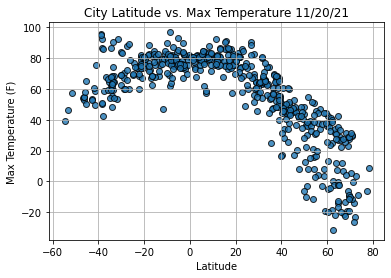

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

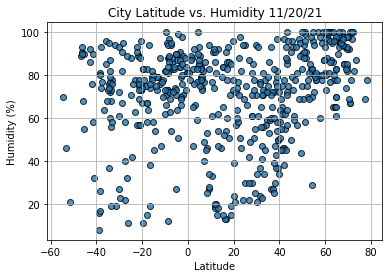

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

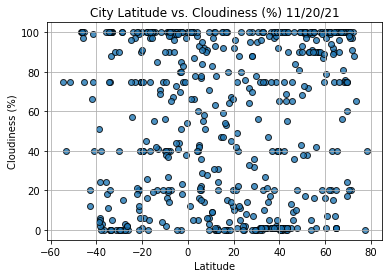

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

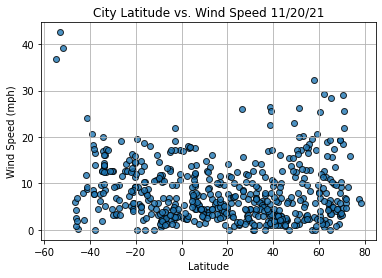

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2021-11-20 19:46:36
Lat                      -34.5322
Lng                       20.0403
Max Temp                    62.28
Humidity                       76
Cloudiness                    100
Wind Speed                  16.96
Name: 13, dtype: object

In [28]:
city_data_df['Lat'] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
534     True
535     True
536    False
537     True
538     True
Name: Lat, Length: 539, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-11-20 19:46:31,42.0970,-79.2353,44.02,46,1,5.99
1,Tasiilaq,GL,2021-11-20 19:46:32,65.6145,-37.6368,28.56,96,100,15.66
2,Upernavik,GL,2021-11-20 19:46:32,72.7868,-56.1549,3.56,82,88,9.17
3,Tuktoyaktuk,CA,2021-11-20 19:46:32,69.4541,-133.0374,-9.40,84,75,8.05
6,Kavaratti,IN,2021-11-20 19:46:33,10.5669,72.6420,80.76,77,83,14.74


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

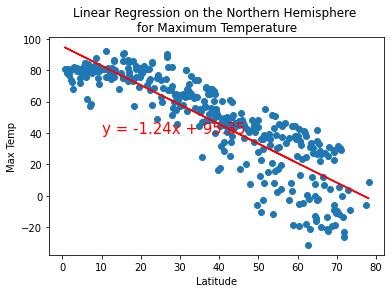

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

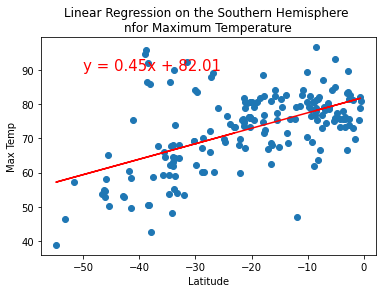

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nnfor Maximum Temperature', 'Max Temp',(-50,90))

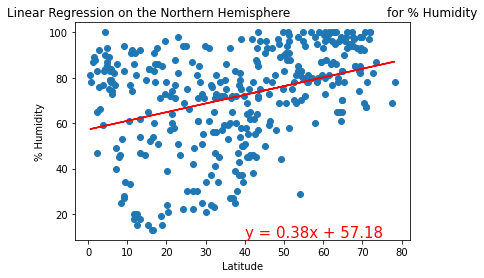

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

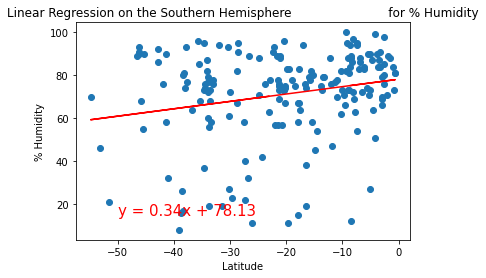

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

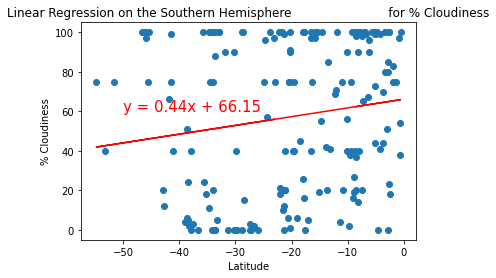

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

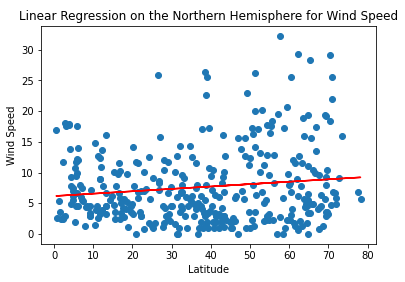

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

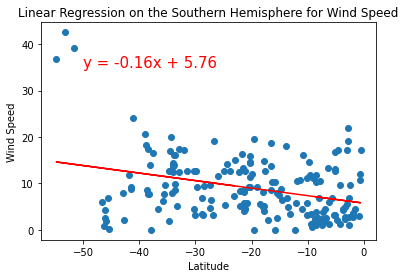

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
